# Data Pre-Processing

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_excel('K-Means_Dataset.xlsx')
data.head()

,Feature 1,Feature 2,Feature 3,Feature 4
0,3.5,5.1,0.2,1.4
1,3.0,4.9,0.2,1.4
2,3.2,4.7,0.2,1.3
3,3.1,4.6,0.2,1.5
4,3.6,5.0,0.2,1.4


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

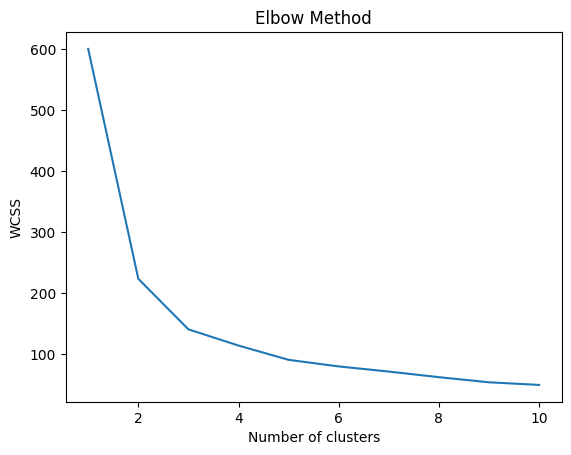

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10, max_iter=100)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Extracting the required features for clustering
features = data[['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']]

In [ ]:
# Converting the DataFrame to a NumPy array
X = features.values

In [ ]:
# Creating a KMeans object and fitting the data
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

In [ ]:
# Getting the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
diff = 1
j = 0

# Convert X to DataFrame
X_df = pd.DataFrame(X, columns=["Feature 1", "Feature 2", "Feature 3", "Feature 4"])

# Initialize Centroids
Centroids = X_df.sample(K)  # Choose K random data points as initial centroids

while diff != 0:
    XD = X_df.copy()
    i = 1
    for index1, row_c in Centroids.iterrows():
        ED = []
        for index2, row_d in XD.iterrows():
            d = np.sqrt(np.sum((row_c - row_d) ** 2))
            ED.append(d)
        X_df[i] = ED
        i = i + 1

    C = []
    for index, row in X_df.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i + 1] < min_dist:
                min_dist = row[i + 1]
                pos = i + 1
        C.append(pos)
    X_df["Cluster"] = C
    Centroids_new = X_df.groupby(["Cluster"]).mean()[["Feature 1", "Feature 2", "Feature 3", "Feature 4"]]
    if j == 0:
        diff = 1
        j = j + 1
    else:
        diff = (
            (Centroids_new["Feature 1"] - Centroids["Feature 1"]).sum()
            + (Centroids_new["Feature 2"] - Centroids["Feature 2"]).sum()
            + (Centroids_new["Feature 3"] - Centroids["Feature 3"]).sum()
            + (Centroids_new["Feature 4"] - Centroids["Feature 4"]).sum()
        )
        print(diff.sum())
    Centroids = Centroids_new

-1.7989197530864187
-1.3722639361057445
-1.1394780358752241
-0.8660587952302846
-0.28410915003199855
-0.21255172671131928
0.0


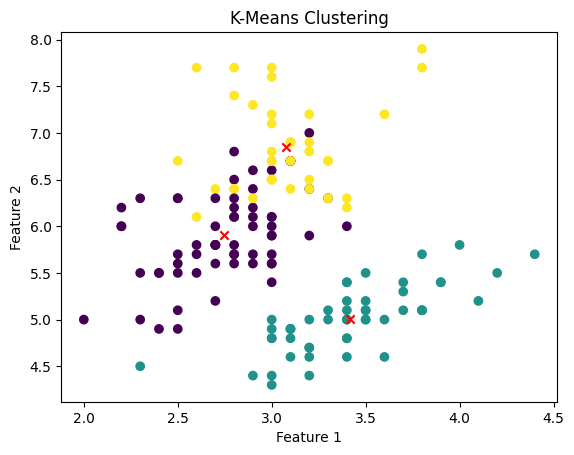

In [ ]:
c

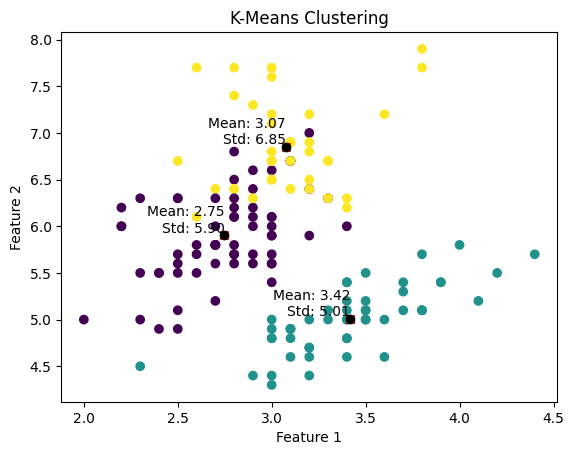

In [ ]:
# Visualizing the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add indicators and distributions
for i in range(len(centroids)):
    centroid = centroids[i]
    cluster_data = data[labels == i]

    # Plot indicators (e.g., mean, standard deviation)
    plt.scatter(centroid[0], centroid[1], marker='o', color='black')
    plt.text(centroid[0], centroid[1], f'Mean: {centroid[0]:.2f}\nStd: {centroid[1]:.2f}',
             fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

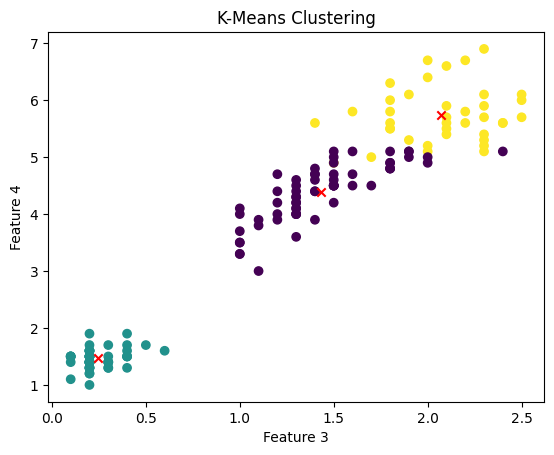

In [ ]:
plt.scatter(X[:, 2], X[:, 3], c=labels, cmap='viridis')
plt.scatter(centroids[:, 2], centroids[:, 3], marker='x', color='red')
plt.title('K-Means Clustering')
plt.xlabel('Feature 3')
plt.ylabel('Feature 4')
plt.show()

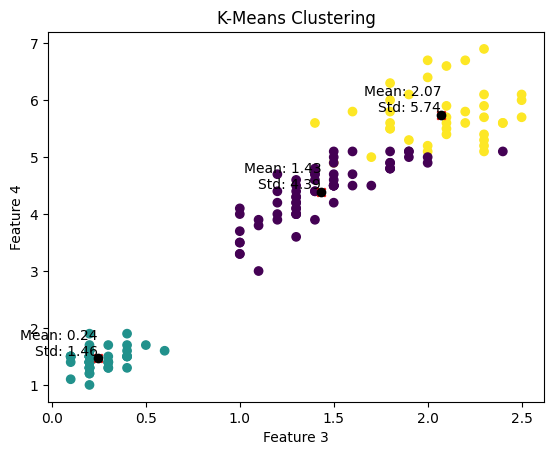

In [ ]:
plt.scatter(X[:, 2], X[:, 3], c=labels, cmap='viridis')
plt.scatter(centroids[:, 2], centroids[:, 3], marker='x', color='red')
plt.title('K-Means Clustering')
plt.xlabel('Feature 3')
plt.ylabel('Feature 4')

# Add indicators and distributions
for i in range(len(centroids)):
    centroid = centroids[i]
    cluster_data = data[labels == i]

    # Plot indicators (e.g., mean, standard deviation)
    plt.scatter(centroid[2], centroid[3], marker='o', color='black')
    plt.text(centroid[2], centroid[3], f'Mean: {centroid[2]:.2f}\nStd: {centroid[3]:.2f}',
             fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()